### Name:  Matthew Collins
### Class:  DSC 530 Data Exploration and Analysis
### Term:   Final Project - World of Warcraft Battlegrounds 

In [162]:
# Importing required libraries.
import pandas as pd
import numpy as np
import re
import thinkstats2
import thinkplot # visualization
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import statistics as sms
from scipy.stats import linregress
%matplotlib inline 
sns.set(color_codes=True)

#### Load the data into the data frame and display first 5 rows.
Content codebook:
- Battleground: Various locations
- Faction: faction of the player (Horde or Alliance).
- Class: class of the player (warrior, paladin, hunter, rogue, priest, death knight, shaman, mage, warlock, monk, druid, demon hunter).
- KB: number of mortal kills given by the player.
- D: number of times that the player died.
- HK: number of killings where the player or his/her group contributed.
- DD: damage done by the player.
- HD: healing done by the player.
- Honor: honor awarded to the player.
- Win: 1 if the player won.
- Lose: 1 if the player lost.
- Rol: dps if the player is a damage dealer; heal if the player is focused in healing allie

In [36]:
wow_df = pd.read_csv("wowbgs2_dataset.csv") # Create df
wow_df.head(5) # display first 5 rows

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol
0,WG,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps
1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps
2,WG,Alliance,Paladin,0,1,19,824,93879,252,NaN,1.0,heal
3,WG,Alliance,Paladin,1,2,25,7046,98599,274,NaN,1.0,heal
4,WG,Alliance,Rogue,2,3,23,65483,19629,268,NaN,1.0,dps


#### Display the last 5 rows of the data frame.

In [37]:
wow_df.tail(5) # display the last 5 rows

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol
5378,TK,Horde,Shaman,3,0,47,19154,2611,465,1.0,NaN,dps
5379,TK,Alliance,Mage,1,4,12,26117,11492,291,NaN,1.0,dps
5380,TK,Alliance,Demon Hunter,2,4,9,39954,9699,282,NaN,1.0,dps
5381,TK,Alliance,Paladin,4,6,9,54729,20736,282,NaN,1.0,dps
5382,TK,Alliance,Rogue,0,5,10,11495,20355,283,NaN,1.0,dps


#### Check the data types.

In [38]:
wow_df.dtypes # displays the data types

Battleground     object
Faction          object
Class            object
KB                int64
D                 int64
HK                int64
DD                int64
HD                int64
Honor             int64
Win             float64
Lose            float64
Rol              object
dtype: object

#### Evaluate the data frame shape

In [39]:
wow_df.shape # display the number of rows and columns of data

(5383, 12)

#### Evaluate for missing or null values

In [40]:
print(wow_df.isnull().sum()) # Prints where the number of missing or null values for each variable

Battleground       0
Faction            0
Class              0
KB                 0
D                  0
HK                 0
DD                 0
HD                 0
Honor              0
Win             2660
Lose            2723
Rol                0
dtype: int64


#### Create a new data frame from the original (preserve original info) and fill in the Win columne NA's with 0.

In [41]:
wow_df2 = wow_df
wow_df2.Win = wow_df2.Win.fillna(0)
wow_df2.head(5)

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,Win,Lose,Rol
0,WG,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps
1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps
2,WG,Alliance,Paladin,0,1,19,824,93879,252,0.0,1.0,heal
3,WG,Alliance,Paladin,1,2,25,7046,98599,274,0.0,1.0,heal
4,WG,Alliance,Rogue,2,3,23,65483,19629,268,0.0,1.0,dps


#### Transform the Win column into a win_loss column.  

In [42]:
wow_df2 = wow_df2.rename(columns = {"Win": "win_loss"})
wow_df2.head(5)

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,win_loss,Lose,Rol
0,WG,Horde,Hunter,1,3,14,48155,6641,532,1.0,NaN,dps
1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1.0,NaN,dps
2,WG,Alliance,Paladin,0,1,19,824,93879,252,0.0,1.0,heal
3,WG,Alliance,Paladin,1,2,25,7046,98599,274,0.0,1.0,heal
4,WG,Alliance,Rogue,2,3,23,65483,19629,268,0.0,1.0,dps


#### Eliminate the lose column.  It is captured within the win_loss column.  Reduces columns of df.

In [43]:
wow_df2 = wow_df2.drop(columns = "Lose")
wow_df2.head(5)

,Battleground,Faction,Class,KB,D,HK,DD,HD,Honor,win_loss,Rol
0,WG,Horde,Hunter,1,3,14,48155,6641,532,1.0,dps
1,WG,Horde,Death Knight,1,3,12,27025,7106,377,1.0,dps
2,WG,Alliance,Paladin,0,1,19,824,93879,252,0.0,heal
3,WG,Alliance,Paladin,1,2,25,7046,98599,274,0.0,heal
4,WG,Alliance,Rogue,2,3,23,65483,19629,268,0.0,dps


### Create histograms of damage and done by Warlocks, Paladins, and Death Knights.

#### Creat histogram for damage totals from all WOW classes

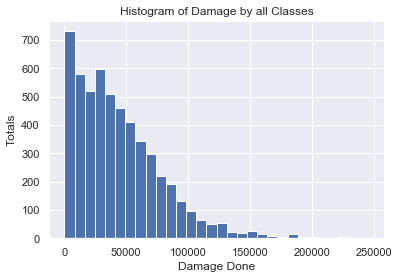

In [44]:
plt.hist(wow_df2.DD, bins = 30)
plt.xlabel('Damage Done')
plt.ylabel('Totals')
plt.title('Histogram of Damage by all Classes')
plt.show()

### Create histogram function for Damage Dealt

In [45]:
def histo (user_input):
    is_class = wow_df2.Class == user_input
    class_df = wow_df2[is_class]
    plt.hist(class_df.DD, bins = 30)
    plt.xlabel('Damage Done')
    plt.ylabel('Totals')
    plt.title('Histogram of ' + user_input + 'Damage')
    return plt.show()

#### Create Warlock Damage Dealt Histogram

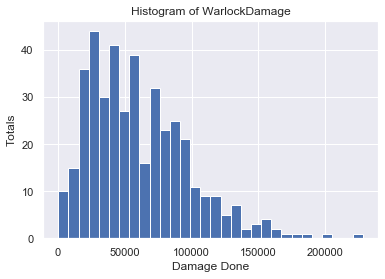

In [46]:
histo('Warlock')

#### Create Death Knight Damage Dealt Histogram

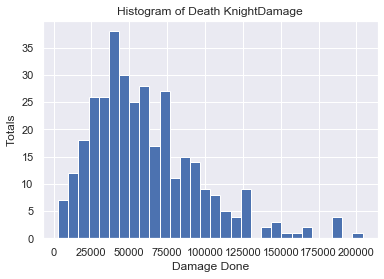

In [47]:
histo('Death Knight')

#### Create Paladin Damage Dealt Histogram

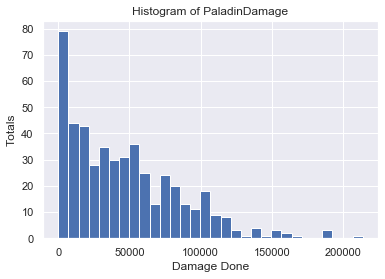

In [48]:
histo('Paladin')

### Create a histogram for all Healing done by all classes

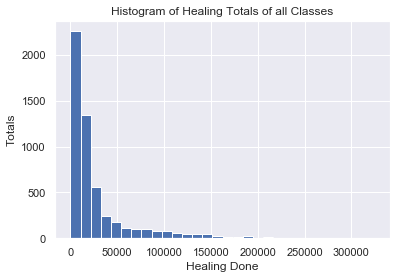

In [168]:
heal_done = wow_df2.HD  # Creates variable for healing done
plt.hist(wow_df2.HD, bins = 30)
plt.xlabel('Healing Done')
plt.ylabel('Totals')
plt.title('Histogram of Healing Totals of all Classes')
plt.show()

#### Create Histogram function for Healing done

In [50]:
def histo_heal (user_input):
    is_class = wow_df2.Class == user_input
    class_df = wow_df2[is_class]
    plt.hist(class_df.HD, bins = 30)
    plt.xlabel('Healing Done')
    plt.ylabel('Totals')
    plt.title('Histogram of ' + user_input + 'Healing')
    return plt.show()

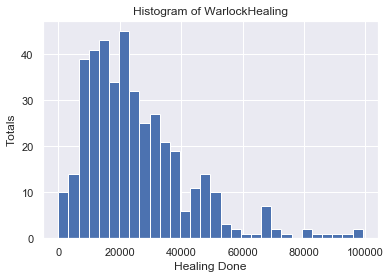

In [51]:
histo_heal('Warlock')

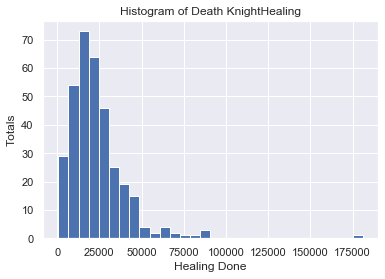

In [52]:
histo_heal('Death Knight')

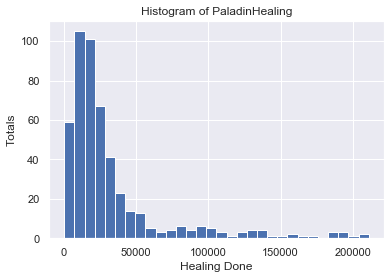

In [53]:
histo_heal('Paladin')

### Histogram of Honor

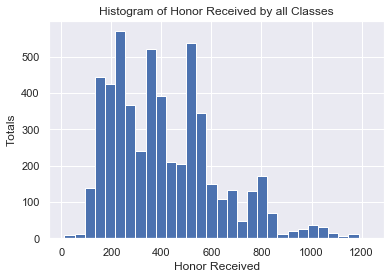

In [54]:
plt.hist(wow_df2.Honor, bins = 30)
plt.xlabel('Honor Received')
plt.ylabel('Totals')
plt.title('Histogram of Honor Received by all Classes')
plt.show()

### Histogram of deaths

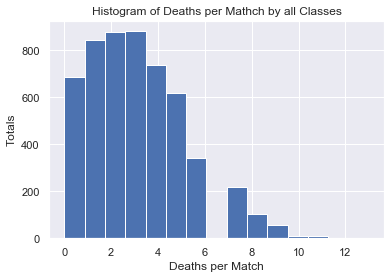

In [55]:
plt.hist(wow_df2.D, bins = 15)
plt.xlabel('Deaths per Match')
plt.ylabel('Totals')
plt.title('Histogram of Deaths per Mathch by all Classes')
plt.show()

### Histogram of Mortal Kills by a Player

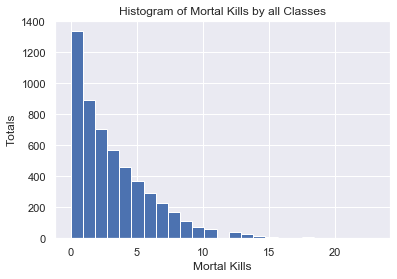

In [56]:
plt.hist(wow_df2.KB, bins = 25)
plt.xlabel('Mortal Kills')
plt.ylabel('Totals')
plt.title('Histogram of Mortal Kills by all Classes')
plt.show()

### Descriptive Statistics for DD, HD, D, KB, Honor

In [57]:
# Calculate Mean, Var, Std

def desc_stats(user_input):
    mean = user_input.mean()
    var = user_input.var()
    std = user_input.std()
    print("mean =", mean)
    print("var =", var)
    print("std =", std)
    

def calc_mode(user_input):
    max_value = max(user_input)
    min_value = min(user_input)
    spread = max_value - min_value
    return spread

#### Descriptive Statistics for Damage Done (DD)

In [58]:
desc_stats(wow_df2.DD)
print("spread =", calc_mode(wow_df2.DD))
print("mode =", sms.mode(wow_df2.DD))

mean = 43880.83875162549
var = 1214015605.1118546
std = 34842.72671752104
spread = 246000
mode = 0


#### Descriptive Statstics for Healing Done (HD)

In [59]:
desc_stats(wow_df2.HD)
print("spread =", calc_mode(wow_df2.HD))
print("mode =", sms.mode(wow_df2.HD))

mean = 28290.26676574401
var = 1548530881.7902122
std = 39351.37712698518
spread = 325000
mode = 0


#### Descriptive Statstics for Deaths (D)

In [60]:
desc_stats(wow_df2.D)
print("spread =", calc_mode(wow_df2.D))
print("mode =", sms.mode(wow_df2.D))

mean = 3.05052944454765
var = 4.845829801390512
std = 2.2013245561230885
spread = 13
mode = 3


#### Descriptive Statstics for Mortal Kills (KB)

In [61]:
desc_stats(wow_df2.KB)
print("spread =", calc_mode(wow_df2.KB))
print("mode =", sms.mode(wow_df2.KB))

mean = 3.0328812929593165
var = 10.008766259967572
std = 3.163663423938705
spread = 23
mode = 0


#### Descriptive Statstics for Honor Received (Honor)

In [62]:
desc_stats(wow_df2.Honor)
print("spread =", calc_mode(wow_df2.Honor))
print("mode =", sms.mode(wow_df2.Honor))

mean = 413.1047742894297
var = 45820.091956020144
std = 214.05628221572977
spread = 1217
mode = 522


### Create a PMF of Deaths (D) of Warlock vs. Paladin

In [63]:
pmf_deaths = thinkstats2.Pmf(wow_df2.D)

is_warlock = wow_df2.Class == "Warlock"
warlock_df = wow_df2[is_warlock]
warlock_pmf = thinkstats2.Pmf(warlock_df.D, label = "Warlock")

is_paladin = wow_df2.Class == "Paladin"
paladin_df = wow_df2[is_paladin]
paladin_pmf = thinkstats2.Pmf(paladin_df.D, label = "Paladin")


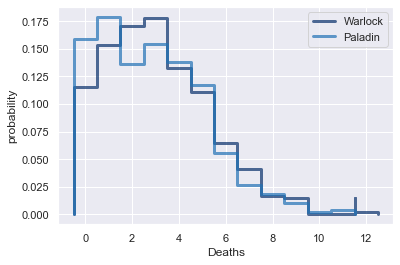

In [64]:
thinkplot.Pmfs([warlock_pmf, paladin_pmf])
thinkplot.Config(xlabel = 'Deaths', ylabel = 'probability')

### Create a CDF of Deaths (D) for Warlocks

In [65]:
warlock_cdf = thinkstats2.Cdf(warlock_df.D, label = "Warlock")

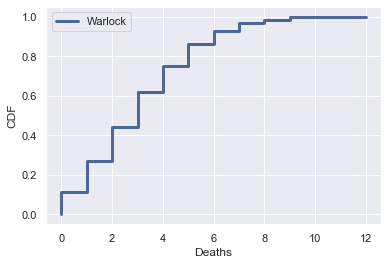

<Figure size 576x432 with 0 Axes>

In [66]:
thinkplot.Cdf(warlock_cdf)
thinkplot.Show(xlabel = "Deaths", ylabel = "CDF")

In [171]:
paladin_cdf = thinkstats2.Cdf(paladin_df.D, label = "Paladin")

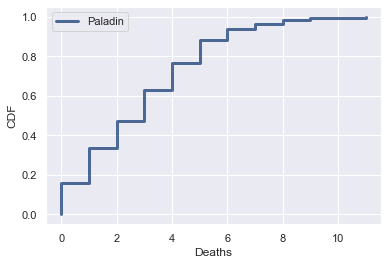

<Figure size 576x432 with 0 Axes>

In [172]:
thinkplot.Cdf(paladin_cdf)
thinkplot.Show(xlabel = "Deaths", ylabel = "CDF")

### A Plot of Log Normal CDF for Warlock Damage vs a Log Normal Model

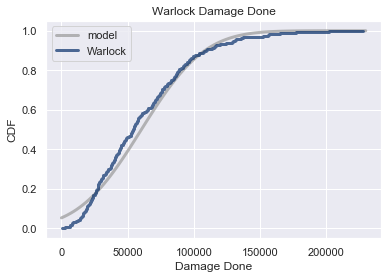

In [67]:
warlock_xs = warlock_df.DD.mean()
var_dd = warlock_df.DD.var()
warlock_sigma = np.sqrt(var_dd)


xs, ps = thinkstats2.RenderNormalCdf(warlock_xs, warlock_sigma, low = 0, high = 230000)

warlock_cdf_dd = thinkstats2.Cdf(warlock_df.DD, label = "Warlock")

thinkplot.Plot(xs, ps, label = "model", color = "0.6")
thinkplot.Cdf(warlock_cdf_dd)
thinkplot.Config(title = "Warlock Damage Done",
                xlabel = "Damage Done",
                ylabel = "CDF")

### Create a scatterplot of Warlock Damage vs. Warlock Healing during a Battleground

Text(0.5, 1.0, 'Scatter plot of Warlock Healing vs. Damage Done per Battle')

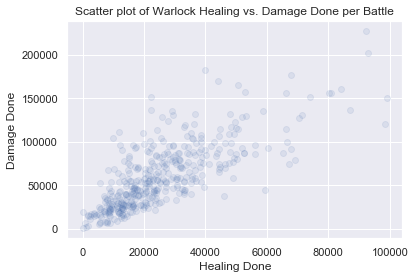

In [173]:
# Extrack Warlock Healing and Damage Done within each battle ground
warlock_dmg = warlock_df.DD
warlock_heal = warlock_df.HD

# Make a scatterplt of the Damage vs. Healing
plt.plot(warlock_heal, warlock_dmg, 'o', alpha = 0.1)

plt.xlabel('Healing Done')
plt.ylabel('Damage Done')
plt.title('Scatter plot of Warlock Healing vs. Damage Done per Battle')

### Create a scatterplot of Paladin Damage vs. Paladin Healing during a Battleground

Text(0.5, 1.0, 'Scatter plot of Paladin Healing vs. Damage Done per Battle')

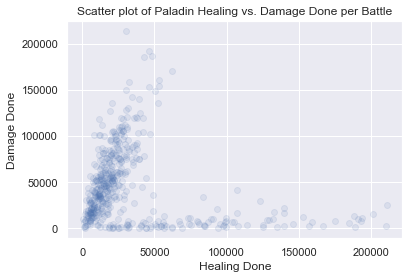

In [77]:
# Extract Paladin Healing variable
paladin_dmg = paladin_df.DD
paladin_heal = paladin_df.HD

# Make a scatterplot of Paladin healing vs. Warlock Damage
plt.plot(paladin_heal, paladin_dmg, 'o', alpha = 0.1)

plt.xlabel('Healing Done')
plt.ylabel('Damage Done')
plt.title('Scatter plot of Paladin Healing vs. Damage Done per Battle')

### Testing the Correlation that during a battle ground heavy healing prevents good damage for Warlocks

In [88]:
# Calculate Correlation of Warlock healing compared to dmg
test_stat = abs(thinkstats2.Corr(warlock_heal, warlock_dmg))
print('Correlation =', test_stat)

Correlation = 0.7604159725927179


In [174]:
# Calculate Correlation of Paladin healing compared to dmg
test_stat = abs(thinkstats2.Corr(paladin_heal, paladin_dmg))
print('Correlation =', test_stat)

Correlation = 0.2038921489381507


In [92]:
# Create a couple of variables for warlock damage mean and standard deviation (note not used for anything)
warlock_dmg_mean = warlock_dmg.mean()
warlock_dmg_std =  warlock_dmg.std()

60418.44711538462 37456.74703784936


In [157]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [158]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [159]:
# Create the data for Hypothesis test analysis
data = warlock_df.HD, warlock_df.DD

In [160]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

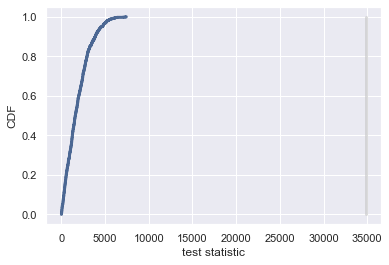

In [161]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

The reported p-value is 0, which means that in 1000 trials we didn't see a correlation, under the null hypothesis, that exceeded the observed correlation. That means that the p-value is probably smaller than  1/1000 , but it is not actually 0.

### Conduct Regression Analysis

In [165]:
# Compute linear regression for Warlock heal vs. damage
res = linregress(warlock_dmg, warlock_heal)
print(res)

LinregressResult(slope=0.3489952501950185, intercept=4495.8979710333915, rvalue=0.7604159725927179, pvalue=1.2633178598592119e-79, stderr=0.014648889255335638)


In [166]:
# Compute linear regression for Paladin heal vs. damage
res = linregress(paladin_dmg, paladin_heal)
print(res)

LinregressResult(slope=-0.1966209631635016, intercept=41669.56408910102, rvalue=-0.20389214893815064, pvalue=5.870685990953883e-06, stderr=0.04291275328224395)
